In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import calplot
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

In [2]:
# Take in all of our AQI data and read it into pandas
AQI_2018 = "Resources/daily_aqi_by_county_2018.csv"
AQI_2019 = "Resources/daily_aqi_by_county_2019.csv"
AQI_2020 = "Resources/daily_aqi_by_county_2020.csv"
AQI_2021 = "Resources/daily_aqi_by_county_2021.csv"
AQI_2022 = "Resources/daily_aqi_by_county_2022.csv"
AQI_2023 = "Resources/daily_aqi_by_county_2023.csv"

AQI_2018_df = pd.read_csv(AQI_2018)
AQI_2019_df = pd.read_csv(AQI_2019)
AQI_2020_df = pd.read_csv(AQI_2020)
AQI_2021_df = pd.read_csv(AQI_2021)
AQI_2022_df = pd.read_csv(AQI_2022)
AQI_2023_df = pd.read_csv(AQI_2023)

In [3]:
#change the date from object to proper date
AQI_2018_df['Date'] = pd.to_datetime(AQI_2018_df['Date'], format='%Y-%m-%d')
AQI_2019_df['Date'] = pd.to_datetime(AQI_2019_df['Date'], format='%Y-%m-%d')
AQI_2020_df['Date'] = pd.to_datetime(AQI_2020_df['Date'], format='%Y-%m-%d')
AQI_2021_df['Date'] = pd.to_datetime(AQI_2021_df['Date'], format='%Y-%m-%d')
AQI_2022_df['Date'] = pd.to_datetime(AQI_2022_df['Date'], format='%Y-%m-%d')
AQI_2023_df['Date'] = pd.to_datetime(AQI_2023_df['Date'], format='%Y-%m-%d')

In [4]:
#Groupby State
nj_2018_df = AQI_2018_df.loc[AQI_2018_df['State Name'] == 'New Jersey']
nj_2018_df
nj_2019_df = AQI_2019_df.loc[AQI_2019_df['State Name'] == 'New Jersey']
nj_2019_df
nj_2020_df = AQI_2020_df.loc[AQI_2020_df['State Name'] == 'New Jersey']
nj_2020_df
nj_2021_df = AQI_2021_df.loc[AQI_2021_df['State Name'] == 'New Jersey']
nj_2021_df
nj_2022_df = AQI_2022_df.loc[AQI_2022_df['State Name'] == 'New Jersey']
nj_2022_df
nj_2023_df = AQI_2023_df.loc[AQI_2023_df['State Name'] == 'New Jersey']
nj_2023_df

State Name county Name  State Code  County Code       Date  AQI  \
98856   New Jersey    Atlantic          34            1 2023-01-01   25   
98857   New Jersey    Atlantic          34            1 2023-01-02   43   
98858   New Jersey    Atlantic          34            1 2023-01-03   50   
98859   New Jersey    Atlantic          34            1 2023-01-04   32   
98860   New Jersey    Atlantic          34            1 2023-01-05   18   
...            ...         ...         ...          ...        ...  ...   
101480  New Jersey      Warren          34           41 2023-06-26   26   
101481  New Jersey      Warren          34           41 2023-06-27   30   
101482  New Jersey      Warren          34           41 2023-06-28   55   
101483  New Jersey      Warren          34           41 2023-06-29  153   
101484  New Jersey      Warren          34           41 2023-06-30  153   

         Category Defining Parameter Defining Site  Number of Sites Reporting  
98856        Good              Ozone   34-001-0006                          1  
98857        Good              PM2.5   34-001-0006                          1  
98858        Good              PM2.5   34-001-0006                          1  
98859        Good              PM2.5   34-001-0006                          1  
98860        Good              Ozone   34-001-0006                          1  
...           ...                ...           ...                        ...  
101480       Good                NO2   34-041-0007                          1  
101481       Good                NO2   34-041-0007                          1  
101482   Moderate              PM2.5   34-041-0007                          1  
101483  Unhealthy              PM2.5   34-041-0007                          1  
101484  Unhealthy              PM2.5   34-041-0007                          1  

[2629 rows x 10 columns]

In [5]:
# Find the mean AQI values

Mean_AQI_2018 = nj_2018_df.groupby("county Name").mean(numeric_only=True)["AQI"]
#Mean_AQI_2018

Mean_AQI_2019 = nj_2019_df.groupby("county Name").mean(numeric_only=True)["AQI"]
#Mean_AQI_2019

Mean_AQI_2020 = nj_2020_df.groupby("county Name").mean(numeric_only=True)["AQI"]
#Mean_AQI_2020

Mean_AQI_2021 = nj_2021_df.groupby("county Name").mean(numeric_only=True)["AQI"]
#Mean_AQI_2021

Mean_AQI_2022 = nj_2022_df.groupby("county Name").mean(numeric_only=True)["AQI"]
#Mean_AQI_2022

Mean_AQI_2023 = nj_2023_df.groupby("county Name").mean(numeric_only=True)["AQI"]
#Mean_AQI_2023

In [6]:
# convert in to a dataframe with summary table 
summary_mean_aqi_df= pd.DataFrame({"Mean AQI 2018": Mean_AQI_2018,
                         "Mean AQI 2019": Mean_AQI_2019,
                         "Mean AQI 2020": Mean_AQI_2020,
                         "Mean AQI 2021": Mean_AQI_2021,
                         "Mean AQI 2022": Mean_AQI_2022,
                         "Mean AQI 2023": Mean_AQI_2023})
summary_mean_aqi_df

Mean AQI 2018  Mean AQI 2019  Mean AQI 2020  Mean AQI 2021  \
county Name                                                               
Atlantic         37.690411      38.567123      35.194986      36.997238   
Bergen           49.378082      47.619178      41.131868      41.975342   
Camden           46.586301      47.506849      41.420765      45.402740   
Cumberland       38.194521      41.703601      38.852055      38.384615   
Essex            42.423077      43.731507      41.314208      41.849315   
Gloucester       41.322464      38.300000      36.581028      39.632997   
Hudson           45.920548      43.597260      39.439891      42.490411   
Hunterdon        41.758523      41.198895      38.398352      40.126374   
Mercer           43.339726      44.002740      39.819672      45.419178   
Middlesex        42.301370      42.417127      39.237705      42.010989   
Monmouth         36.342857      38.962500      37.765487      39.674510   
Morris           37.857534      37.401099      35.581967      37.066116   
Ocean            37.601719      38.140401      34.685393      39.577031   
Passaic          39.032491      38.938628      36.366412      36.597701   
Union            43.301370      42.586301      39.133880      43.890411   
Warren           37.554622      36.755495      35.941828      38.446927   

             Mean AQI 2022  Mean AQI 2023  
county Name                                
Atlantic         34.041096      39.662983  
Bergen           39.246575      44.329670  
Camden           43.542466      49.280220  
Cumberland       36.698895      44.994475  
Essex            42.498141            NaN  
Gloucester       41.708333      46.807143  
Hudson           41.452055      45.182320  
Hunterdon        40.285714      48.320442  
Mercer           42.882192      49.856459  
Middlesex        40.183562      47.607735  
Monmouth         39.270161      43.377049  
Morris           37.186111      43.138889  
Ocean            37.382682      43.033149  
Passaic          36.338816      43.005917  
Union            41.350685      45.802198  
Warren           38.537190      41.796610

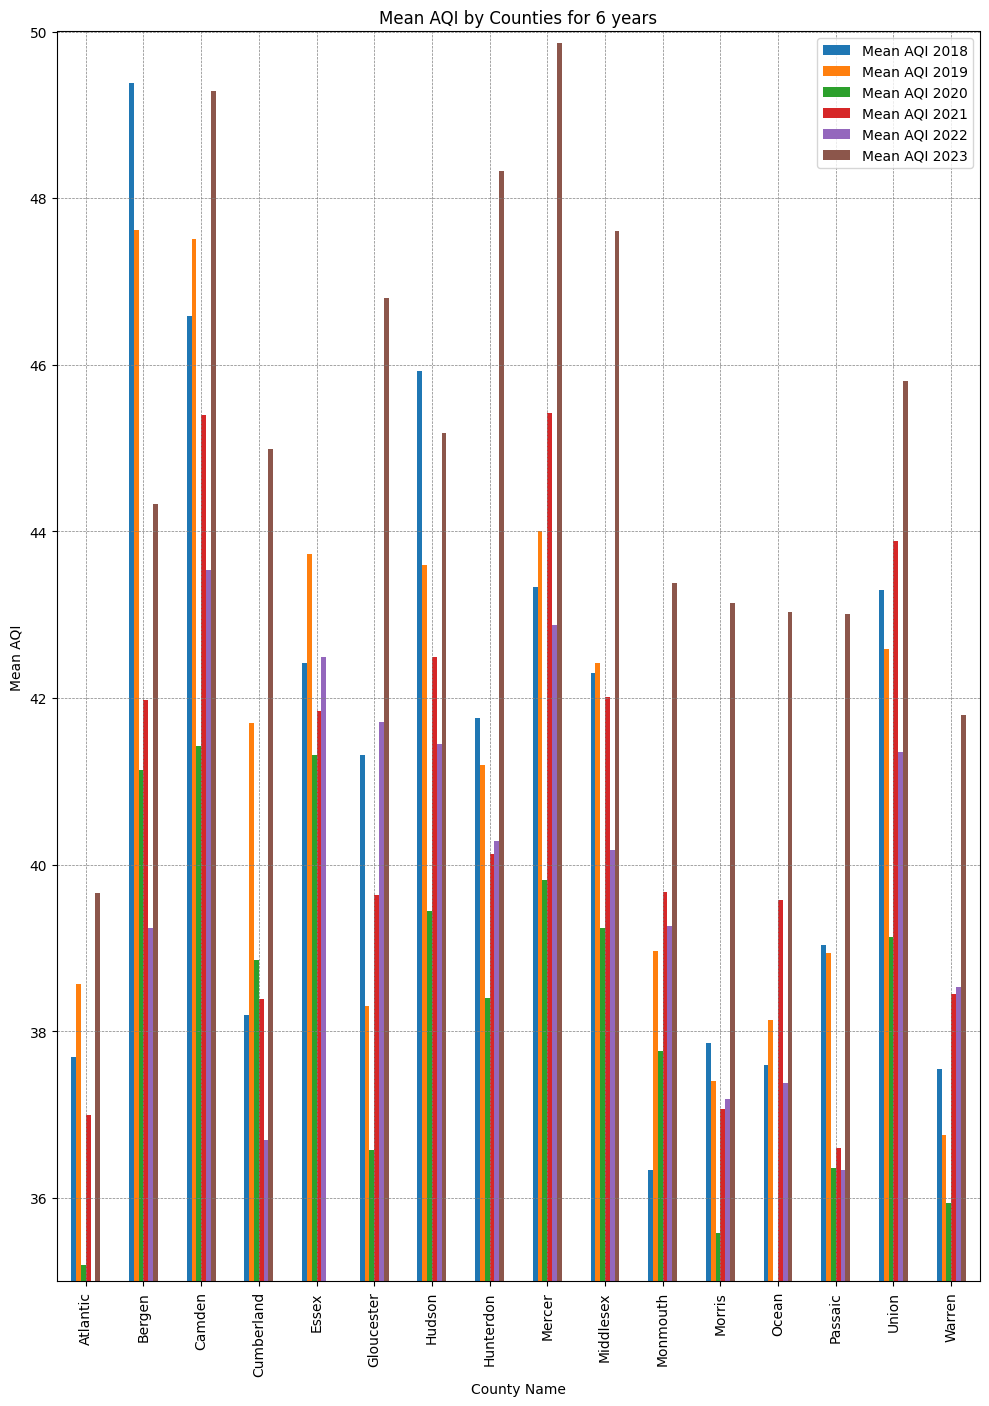

In [7]:
# Create a bar chart based off of the group series from before
mean_aqi_chart = summary_mean_aqi_df.plot(kind='bar', figsize=(10,14))

# Set the xlabel and ylabel using class methods
mean_aqi_chart.set_xlabel("County Name")
mean_aqi_chart.set_ylabel("Mean AQI")
plt.ylim(35,50)

plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title("Mean AQI by Counties for 6 years")
plt.savefig("mean_aqi_by_countyname.png")
#plt.show()

In [8]:
# Generate a bar plot showing how the Mean AQI varies by year for each county using plotly
fig = go.Figure()

# Add bars for each y-value column using the index as x
for col in summary_mean_aqi_df.columns:
    fig.add_trace(go.Bar(
        x=summary_mean_aqi_df.index,
        y=summary_mean_aqi_df[col],
        name=col
     
                   ))

# Update the layout for grouped bars and set template to none
fig.update_layout(
    barmode='group',                # Group the bars side by side
    template='none',                # Disable the default template
    title='Mean AQIs across various counties by Year',
    xaxis_title='County Name',
    yaxis_title='Mean AQI',
    yaxis=dict(range=[30, 50]),
    width = 1100,
    height =800

    
)
# Show the figure
fig.show()
#Alternative: Using Plotly's to_image function:
# Plotly could not save the figure, but this plot allows the you to view every individual point to see the value.

In [9]:
# Install import_ipynb to use functions from other notebooks if you don't already.
!pip install import_ipynb

In [48]:
# Import plot function from other working notebook
import import_ipynb as ipynb
from MaxMin import stacked_Max
# Note: Initial run imports all graphs from notebook, Need to run this code again and then continue to functions of graphs.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


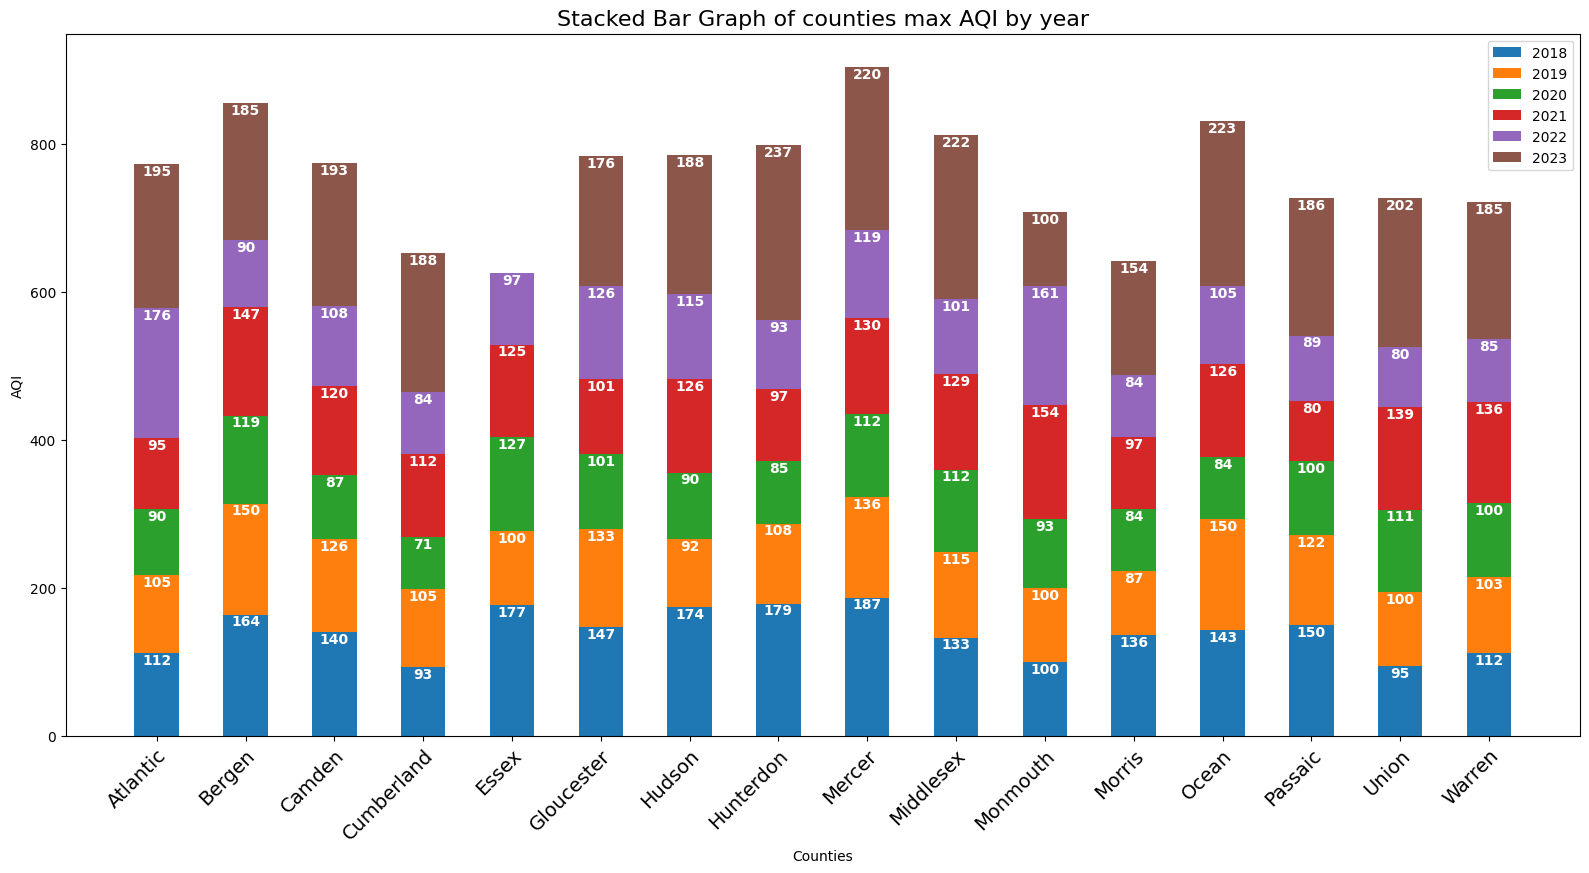

In [49]:
stacked_Max()

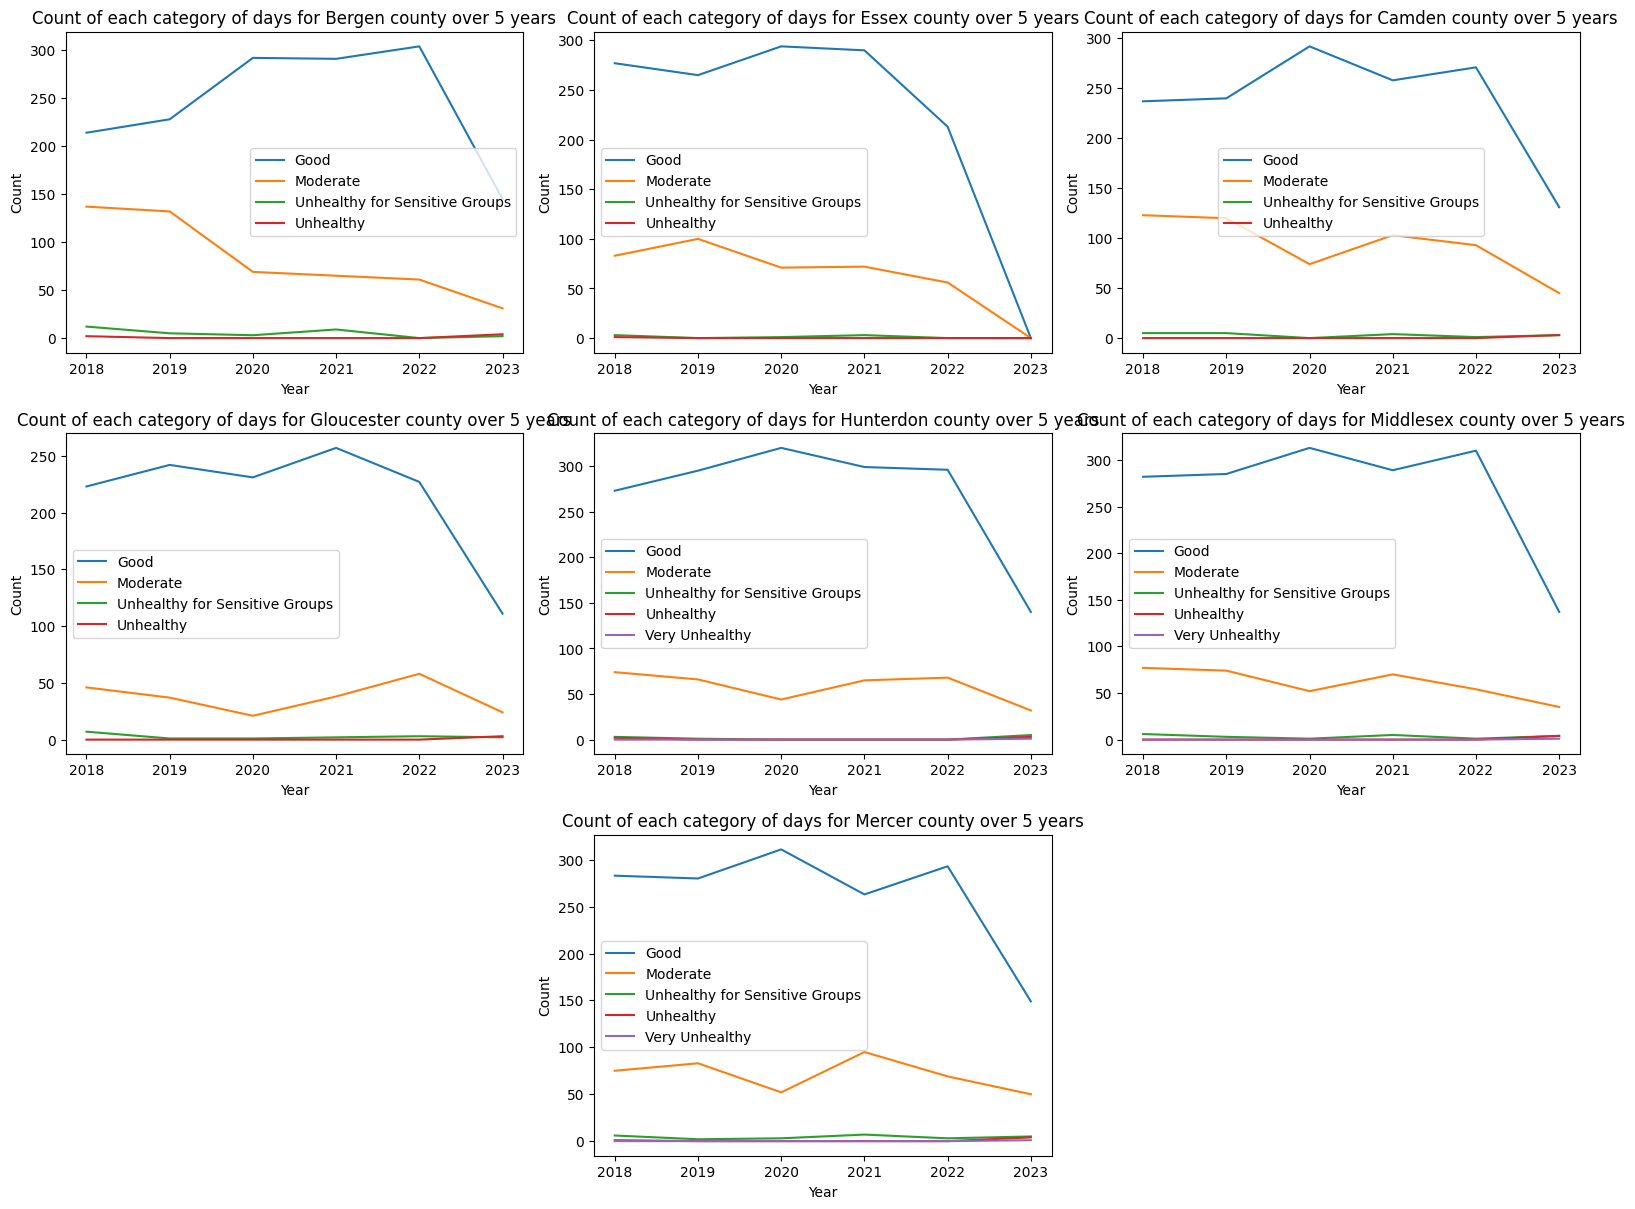

In [12]:
#can do breakdown per counties of interest
#merge years df by county
combined_df = pd.concat([nj_2018_df, nj_2019_df, nj_2020_df, nj_2021_df, nj_2022_df, nj_2023_df])
#create column with just year using Date column
combined_df['year'] = pd.to_datetime(combined_df['Date']).dt.year
fig = plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
categories = combined_df[combined_df['county Name'] == 'Bergen']['Category'].unique()
years = combined_df['year'].unique()
for category in categories:
    categories_count = []
    for year in years:
        count = combined_df[(combined_df['county Name'] == 'Bergen') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count.append(count) 
    plt.plot(years, categories_count, label=category)
plt.legend()
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of each category of days for Bergen county over 5 years')


plt.subplot(3, 3, 2)
categories2 = combined_df[combined_df['county Name'] == 'Essex']['Category'].unique()
for category in categories2:
    categories_count2 = []
    for year in years:
        count2 = combined_df[(combined_df['county Name'] == 'Essex') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count2.append(count2) 
    plt.plot(years, categories_count2, label=category)
plt.legend()
plt.xlabel('Year')
plt.tight_layout()
plt.ylabel('Count')
plt.title('Count of each category of days for Essex county over 5 years')

plt.subplot(3,3,3)
categories3 = combined_df[combined_df['county Name'] == 'Camden']['Category'].unique()
for category in categories3:
    categories_count3 = []
    for year in years:
        count3 = combined_df[(combined_df['county Name'] == 'Camden') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count3.append(count3) 
    plt.plot(years, categories_count3, label=category)
plt.legend()
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of each category of days for Camden county over 5 years')


plt.subplot(3, 3, 4)
categories4 = combined_df[combined_df['county Name'] == 'Gloucester']['Category'].unique()
for category in categories4:
    categories_count4 = []
    for year in years:
        count4 = combined_df[(combined_df['county Name'] == 'Gloucester') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count4.append(count4) 
    plt.plot(years, categories_count4, label=category)
plt.legend()
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of each category of days for Gloucester county over 5 years')

plt.subplot(3, 3, 5)
categories5 = combined_df[combined_df['county Name'] == 'Hunterdon']['Category'].unique()
for category in categories5:
    categories_count5 = []
    for year in years:
        count5 = combined_df[(combined_df['county Name'] == 'Hunterdon') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count5.append(count5) 
    plt.plot(years, categories_count5, label=category)
plt.legend()
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of each category of days for Hunterdon county over 5 years')

plt.subplot(3, 3, 6)
categories6 = combined_df[combined_df['county Name'] == 'Middlesex']['Category'].unique()
for category in categories6:
    categories_count6 = []
    for year in years:
        count6 = combined_df[(combined_df['county Name'] == 'Middlesex') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count6.append(count6) 
    plt.plot(years, categories_count6, label=category)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of each category of days for Middlesex county over 5 years')

plt.subplot(3, 3, 8)
categories7 = combined_df[combined_df['county Name'] == 'Mercer']['Category'].unique()
for category in categories7:
    categories_count7 = []
    for year in years:
        count7 = combined_df[(combined_df['county Name'] == 'Mercer') & (combined_df['Category'] == category) & (combined_df['year'] == year)].shape[0]
        categories_count7.append(count7) 
    plt.plot(years, categories_count7, label=category)
plt.legend()
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of each category of days for Mercer county over 5 years')

plt.savefig('categories_of_AQI.png' ,dpi=300, bbox_inches = "tight")

In [13]:
# Import Graph functions from other working notebook
from MaxMin import bergen_calplot
from MaxMin import mercer_calplot

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

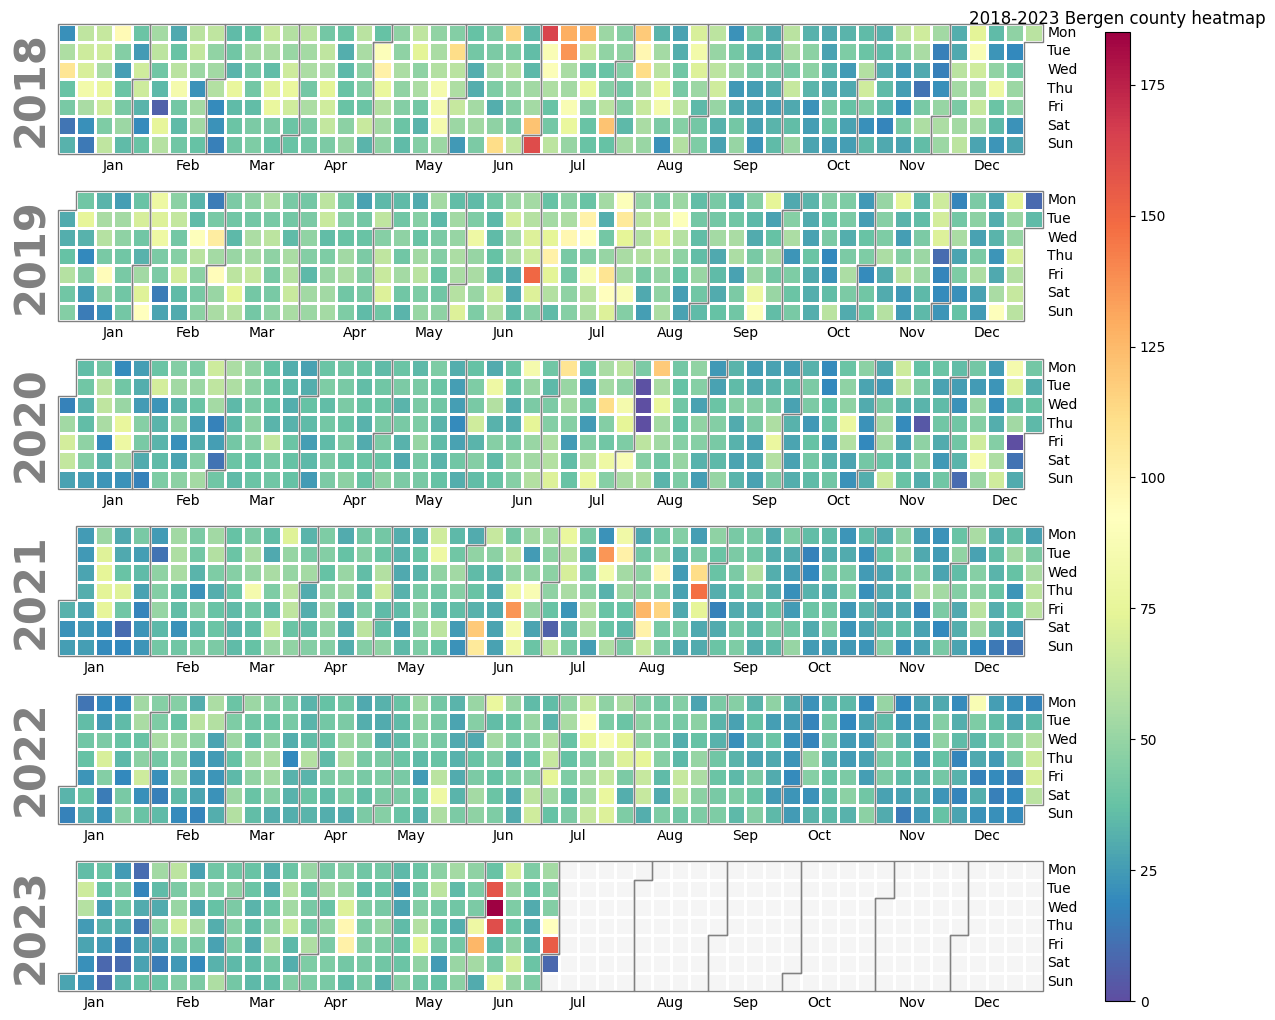

In [14]:
bergen_calplot()

In [15]:
# Set up Union data
Union_2018 = nj_2018_df.loc[nj_2018_df['county Name'] == 'Union',:]
Union_2019 = nj_2019_df.loc[nj_2019_df['county Name'] == 'Union',:]
Union_2020 = nj_2020_df.loc[nj_2020_df['county Name'] == 'Union',:]
Union_2021 = nj_2021_df.loc[nj_2021_df['county Name'] == 'Union',:]
Union_2022 = nj_2022_df.loc[nj_2022_df['county Name'] == 'Union',:]
Union_2023 = nj_2023_df.loc[nj_2023_df['county Name'] == 'Union',:]

all_years_union = [Union_2018, Union_2019, Union_2020, Union_2021, Union_2022, Union_2023]
union_df = pd.concat(all_years_union)
union_df = union_df.set_index('Date')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


Text(0.5, 1.0, 'Air Quality Index for Union County 2018-2023')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


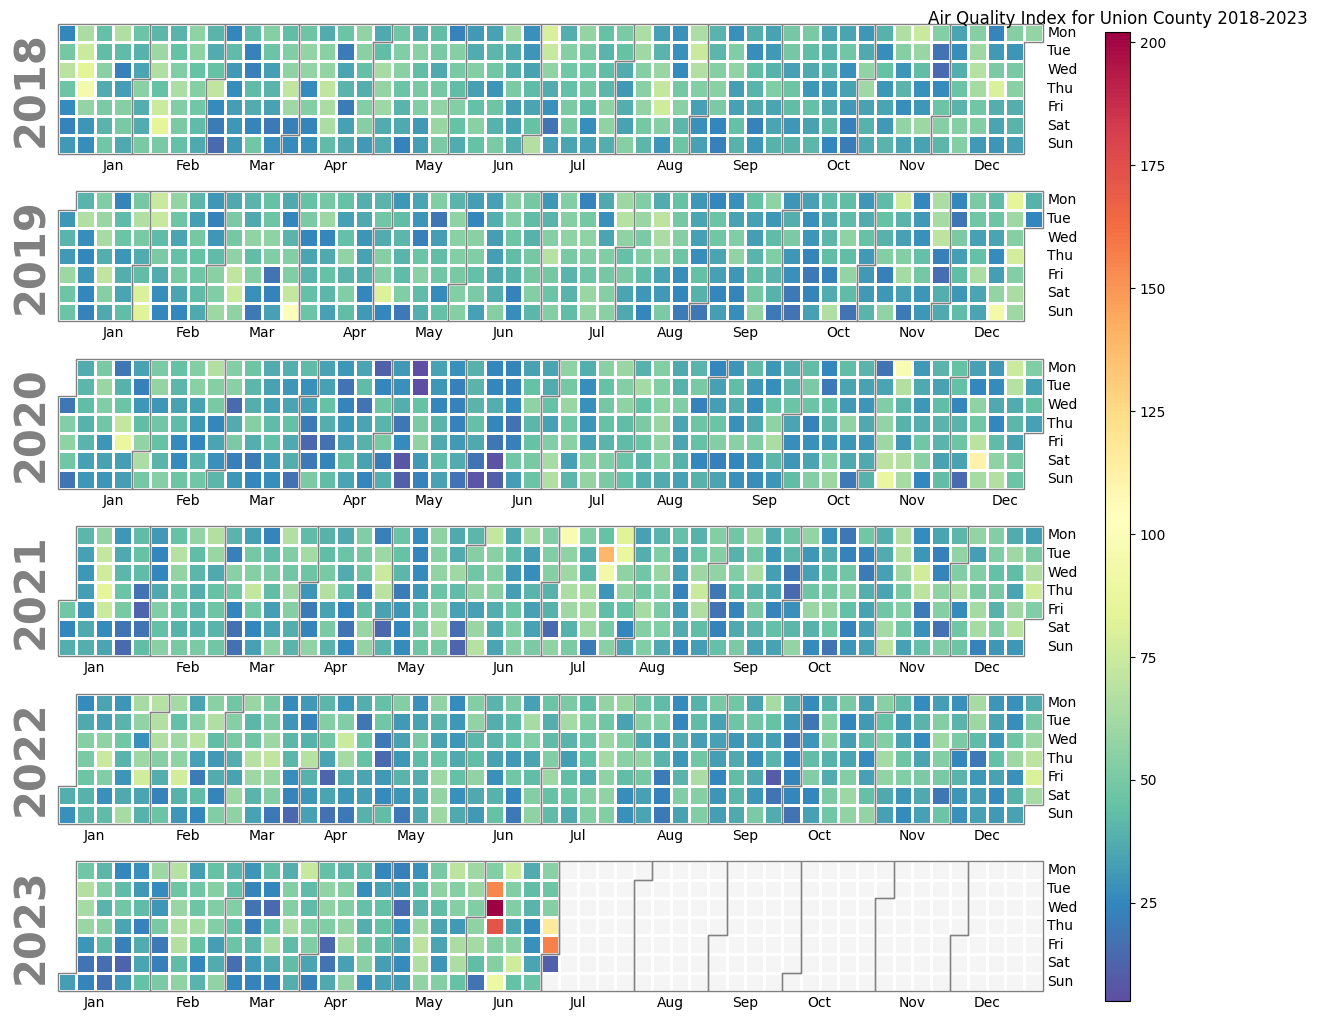

In [16]:
# Union calplot
calplot.calplot(union_df['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Union County 2018-2023")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

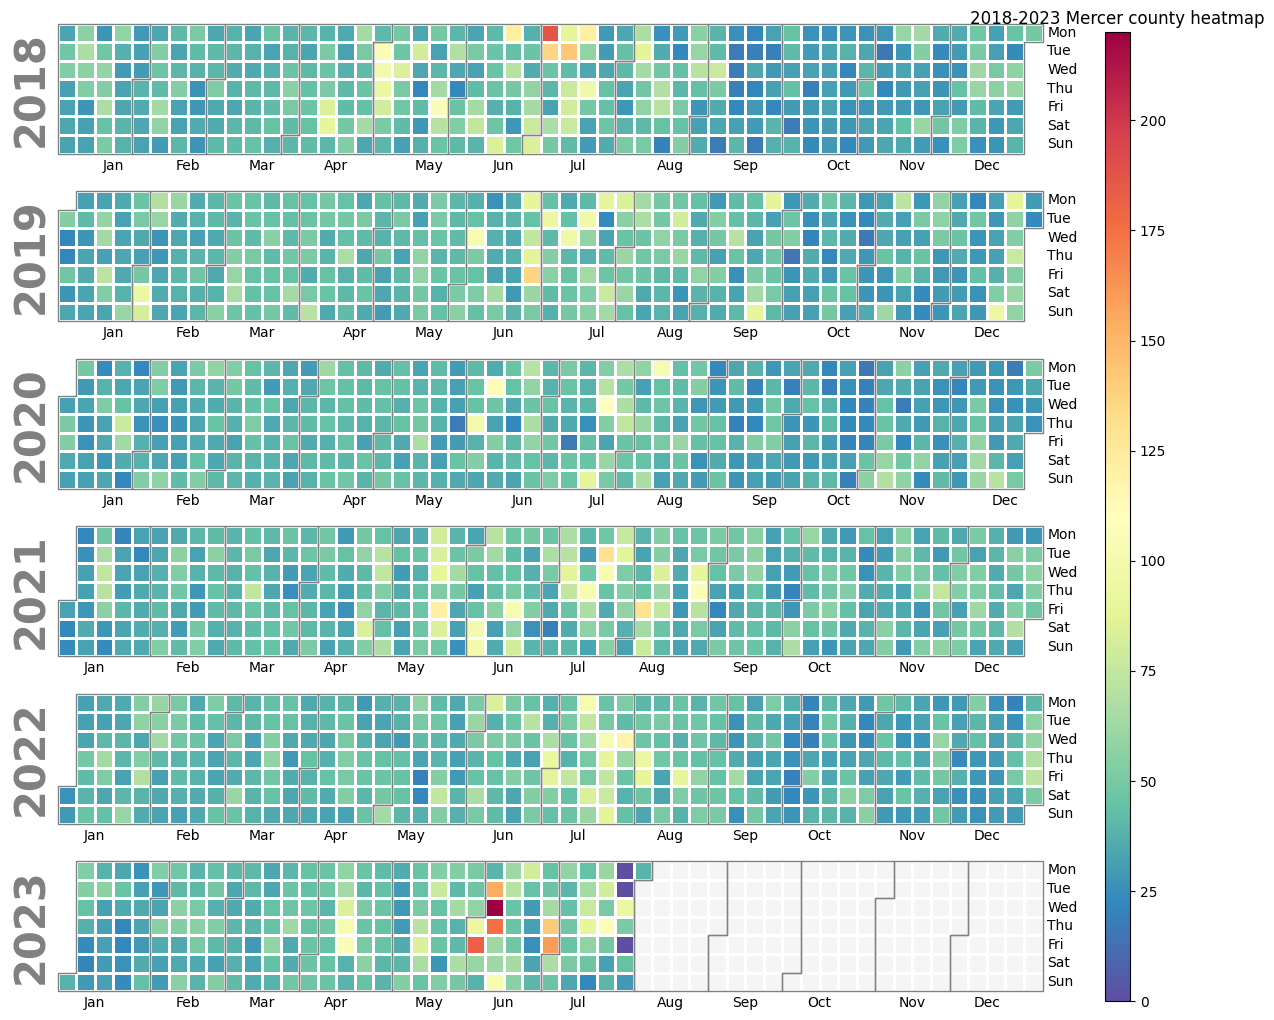

In [17]:
mercer_calplot()

In [18]:
Hunterdon_2018 = nj_2018_df.loc[nj_2018_df['county Name'] == 'Hunterdon',:]
Hunterdon_2019 = nj_2019_df.loc[nj_2019_df['county Name'] == 'Hunterdon',:]
Hunterdon_2020 = nj_2020_df.loc[nj_2020_df['county Name'] == 'Hunterdon',:]
Hunterdon_2021 = nj_2021_df.loc[nj_2021_df['county Name'] == 'Hunterdon',:]
Hunterdon_2022 = nj_2022_df.loc[nj_2022_df['county Name'] == 'Hunterdon',:]
Hunterdon_2023 = nj_2023_df.loc[nj_2023_df['county Name'] == 'Hunterdon',:]

all_years_hunterdon = [Hunterdon_2018, Hunterdon_2019, Hunterdon_2020, Hunterdon_2021, Hunterdon_2022, Hunterdon_2023]
hunterdon_df = pd.concat(all_years_union)
hunterdon_df = hunterdon_df.set_index('Date')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


Text(0.5, 1.0, 'Air Quality Index for Hunterdon County 2018-2023')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


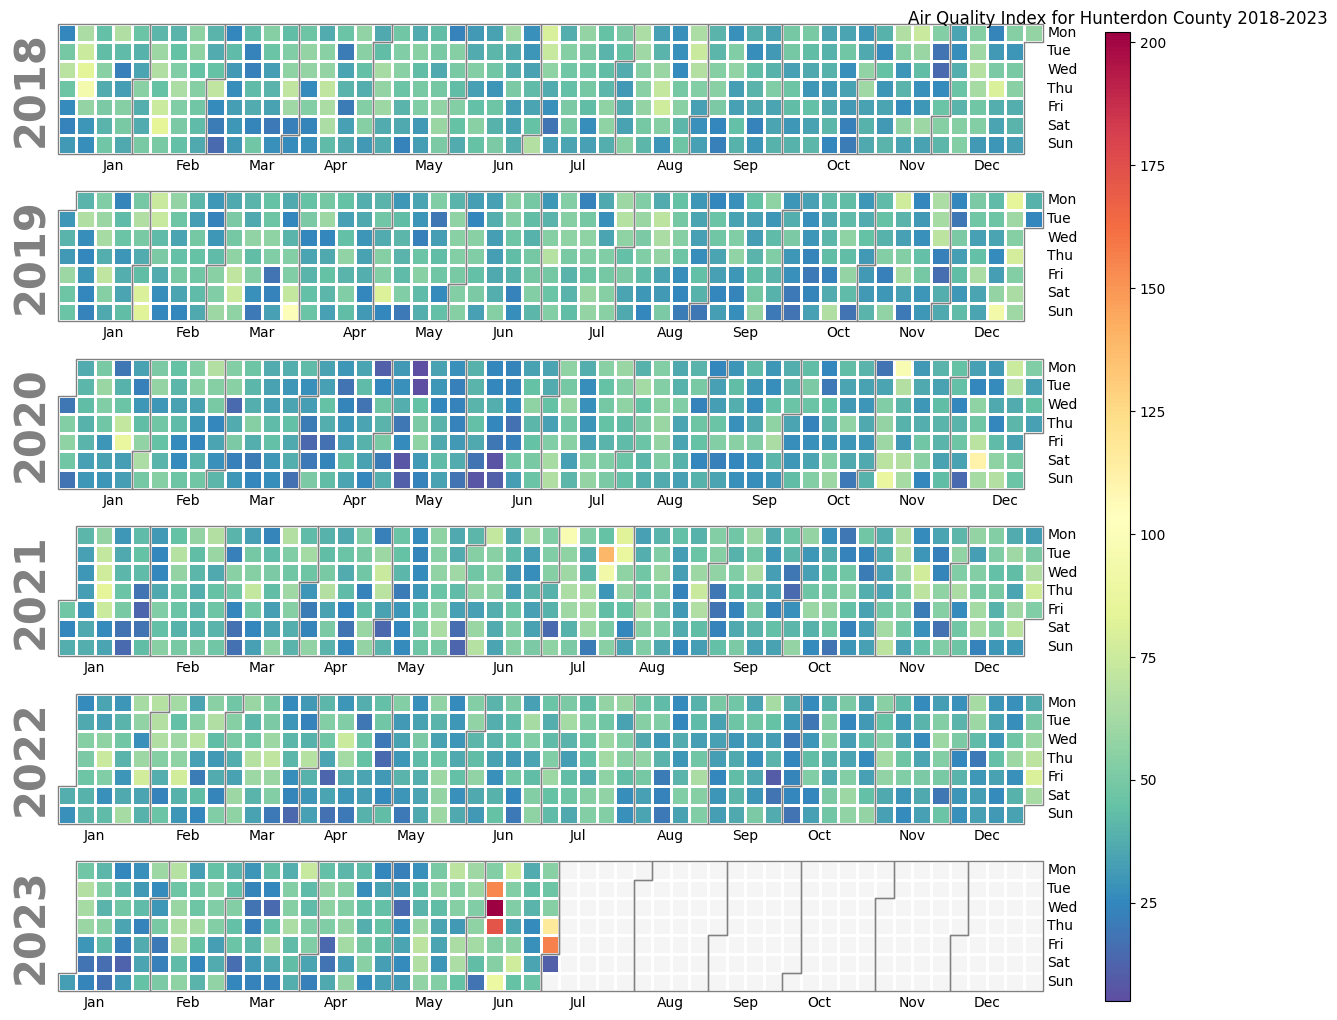

In [19]:
# Hunterdon calplot
calplot.calplot(hunterdon_df['AQI'], cmap='Spectral_r')
plt.title("Air Quality Index for Hunterdon County 2018-2023")

In [20]:
# Concatenate the data frames for years 2018 to 2023
all_data = pd.concat([nj_2018_df, nj_2018_df, nj_2020_df, nj_2021_df, nj_2022_df, nj_2023_df])

# Filter data for New Jersey and set up the DataFrame
state_data = all_data.groupby("State Name").get_group("New Jersey").copy()
state_data.set_index('Date', inplace=True)
state_data.index = pd.to_datetime(state_data.index)
state_data['year'] = state_data.index.year

state_data.head()

State Name county Name  State Code  County Code  AQI Category  \
Date                                                                        
2018-01-01  New Jersey    Atlantic          34            1   34     Good   
2018-01-02  New Jersey    Atlantic          34            1   38     Good   
2018-01-03  New Jersey    Atlantic          34            1   38     Good   
2018-01-04  New Jersey    Atlantic          34            1   33     Good   
2018-01-05  New Jersey    Atlantic          34            1   33     Good   

           Defining Parameter Defining Site  Number of Sites Reporting  year  
Date                                                                          
2018-01-01              Ozone   34-001-0006                          1  2018  
2018-01-02              PM2.5   34-001-0006                          2  2018  
2018-01-03              PM2.5   34-001-0006                          1  2018  
2018-01-04              Ozone   34-001-0006                          1  2018  
2018-01-05              Ozone   34-001-0006                          2  2018

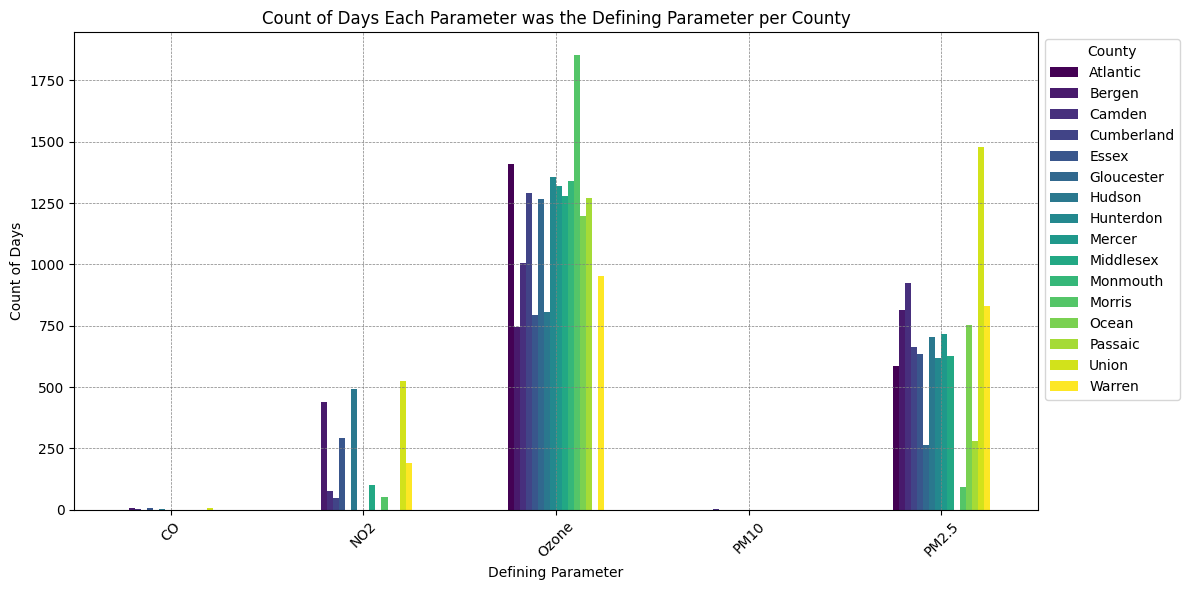

In [21]:
# Group by the defining parameter and county, then count the days each parameter was the defining parameter
count_days_per_parameter = state_data.groupby(['Defining Parameter', 'county Name']).size().unstack()

# Create the bar graph
count_days_per_parameter.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Defining Parameter')
plt.ylabel('Count of Days')
plt.title('Count of Days Each Parameter was the Defining Parameter per County')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='County', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
# Display the bar graph
plt.show()

<Figure size 2600x2600 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

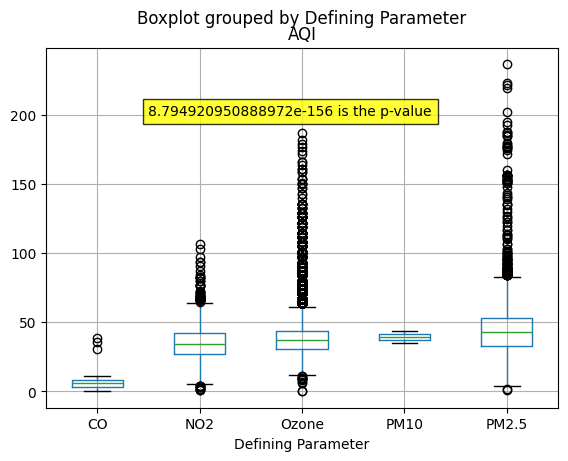

In [22]:
from MaxMin import nj_params_boxplot
plt.figure(figsize=(26,26))
nj_params_boxplot()

<string>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<string>:27: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<string>:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<string>:55: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<string>:69:

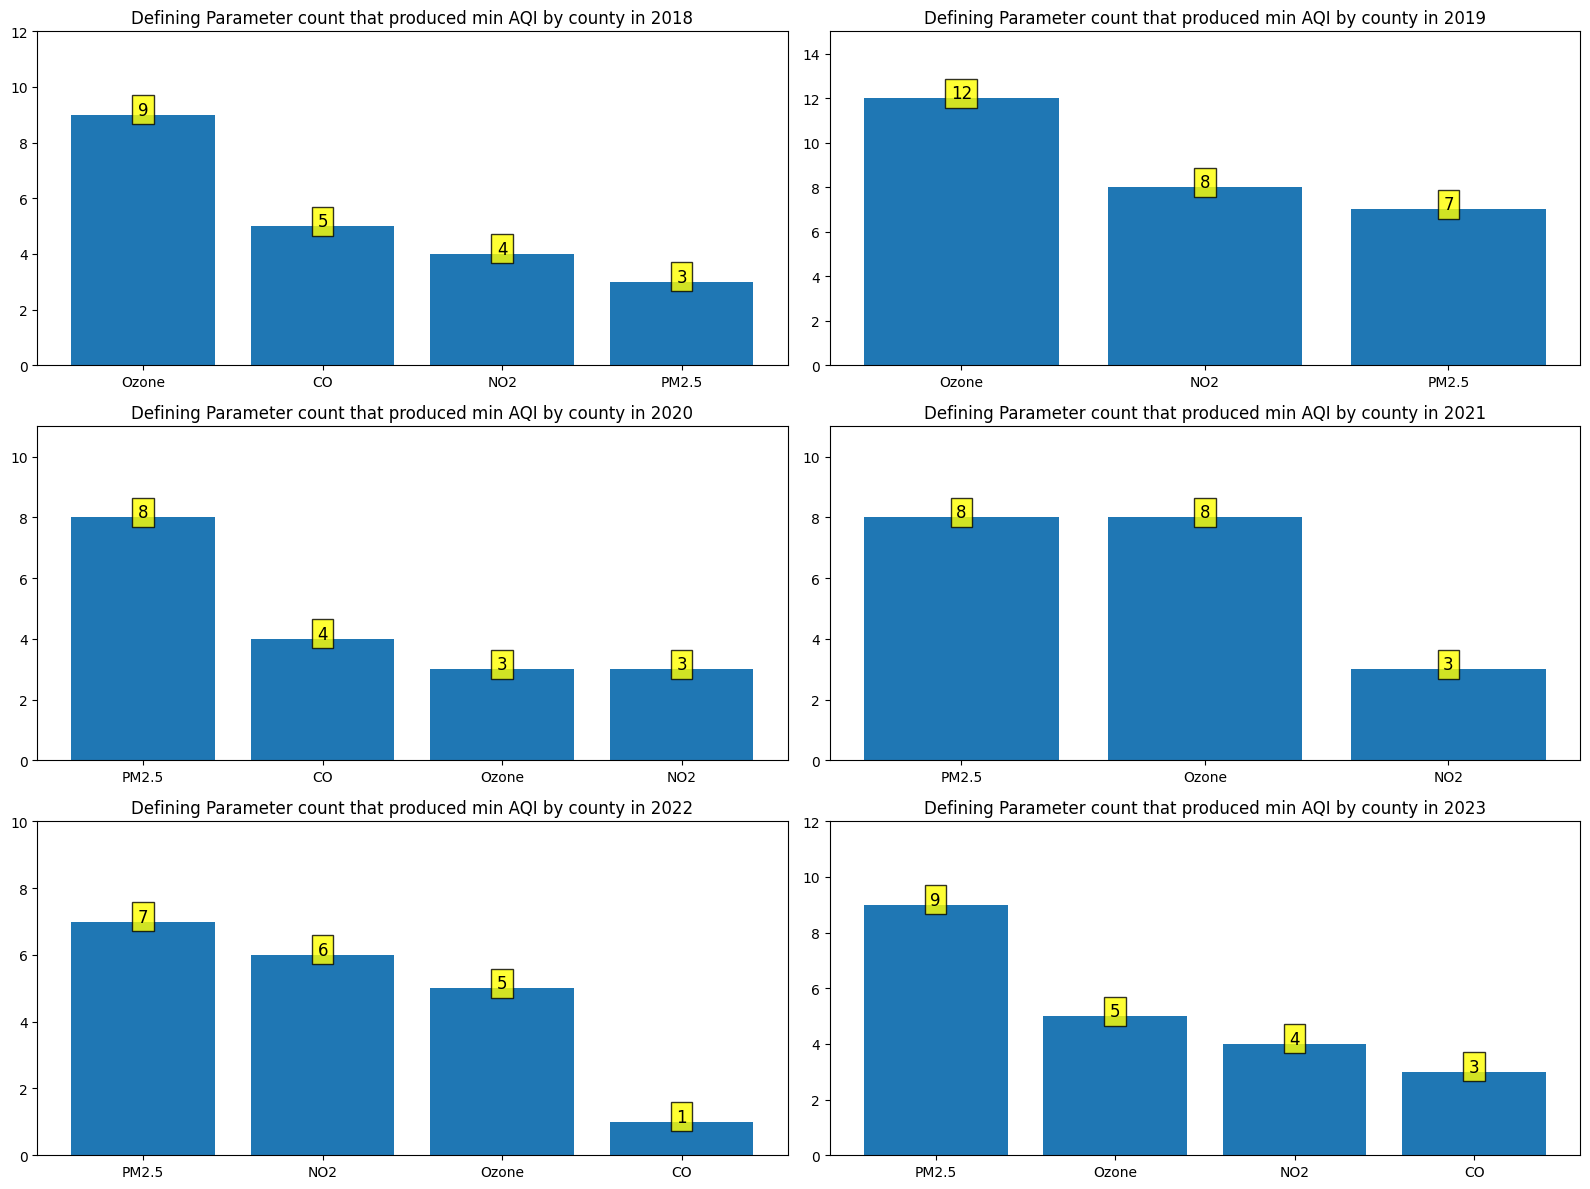

In [23]:
from MaxMin import min_param_count
min_param_count()

In [24]:
# Code to create graph for Identifying Parameters Contributing to Unhealthy Air Quality Days in New Jersey
unique_values_category = nj_2023_df["Category"].unique()


In [25]:
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy")
filtered_2018_unhealthy_df = nj_2018_df[nj_2018_df['Category'] == 'Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unhealthy_2018 = filtered_2018_unhealthy_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unhealthy_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy for sensitive groups")
filtered_2018_unfs_df = nj_2018_df[nj_2018_df['Category'] == 'Unhealthy for Sensitive Groups']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unfs_2018 = filtered_2018_unfs_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unfs_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Very Unhealthy")
filtered_2018_vuh_df = nj_2018_df[nj_2018_df['Category'] == 'Very Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_vuh_2018 = filtered_2018_vuh_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_vuh_2018)
# Merge the counts for all three categories
merged_categories_2018_df = pd.merge(parameter_count_unhealthy_2018, parameter_count_unfs_2018, on='Defining Parameter', how='outer')
#merged_categories_2018_df
#Rename the columns in the dataframe 
# Rename our _x columns to "2018 Unhealthy", 
merged_categories_2018_df = merged_categories_2018_df.rename(columns={"Count_x":"2018_Unhealthy",
                                                                     "Count_y":"2018_Unhealthysens"})                                                     

merged_categories_2018_df.head()

#set defining parameter as the index
merged_categories_2018_df.set_index('Defining Parameter', inplace=True)

In [26]:
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy")
filtered_2019_unhealthy_df = nj_2019_df[nj_2019_df['Category'] == 'Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unhealthy_2019 = filtered_2019_unhealthy_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unhealthy_2019)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy for sensitive groups")
filtered_2019_unfs_df = nj_2019_df[nj_2019_df['Category'] == 'Unhealthy for Sensitive Groups']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unfs_2019 = filtered_2019_unfs_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unfs_2019)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "very unhealthy")
filtered_2019_vuh_df = nj_2019_df[nj_2019_df['Category'] == 'Very Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_vuh_2019 = filtered_2019_vuh_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_vuh_2019)
parameter_count_unfs_2019_df=pd.DataFrame(parameter_count_unfs_2019)
##set defining parameter as the index
parameter_count_unfs_2019_df.set_index('Defining Parameter', inplace=True)
#print(parameter_count_unfs_2019_df)
#Rename the columns in the dataframe 
parameter_count_unfs_2019_df = parameter_count_unfs_2019_df.rename(columns={"Count":"2019_Unhealthysens"})
                                                                                                                        
parameter_count_unfs_2019_df

2019_Unhealthysens
Defining Parameter                    
NO2                                  1
Ozone                               23
PM2.5                                1

In [27]:
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy")
filtered_2020_unhealthy_df = nj_2020_df[nj_2020_df['Category'] == 'Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unhealthy_2020 = filtered_2020_unhealthy_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unhealthy_2020)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy for sensitive groups")
filtered_2020_unfs_df = nj_2020_df[nj_2020_df['Category'] == 'Unhealthy for Sensitive Groups']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unfs_2020 = filtered_2020_unfs_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unfs_2020)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "very unhealthy")
filtered_2020_vuh_df = nj_2020_df[nj_2020_df['Category'] == 'Very Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_vuh_2020 = filtered_2020_vuh_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_vuh_2020)
parameter_count_unfs_2020_df=pd.DataFrame(parameter_count_unfs_2020)
##set defining parameter as the index
parameter_count_unfs_2020_df.set_index('Defining Parameter', inplace=True)
#print(parameter_count_unfs_2020_df)
#Rename the columns in the dataframe 
parameter_count_unfs_2020_df = parameter_count_unfs_2020_df.rename(columns={"Count":"2020_Unhealthysens"})
                                                                                                                        
parameter_count_unfs_2020_df

2020_Unhealthysens
Defining Parameter                    
Ozone                                8
PM2.5                                2

In [28]:
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy")
filtered_2021_unhealthy_df = nj_2021_df[nj_2021_df['Category'] == 'Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unhealthy_2021 = filtered_2021_unhealthy_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unhealthy_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy for sensitive groups")
filtered_2021_unfs_df = nj_2021_df[nj_2021_df['Category'] == 'Unhealthy for Sensitive Groups']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unfs_2021 = filtered_2021_unfs_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unfs_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Very Unhealthy")
filtered_2021_vuh_df = nj_2021_df[nj_2021_df['Category'] == 'Very Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_vuh_2021 = filtered_2021_vuh_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_vuh_2018)
# Merge the counts for all three categories
merged_categories_2021_df = pd.merge(parameter_count_unhealthy_2021, parameter_count_unfs_2021, on='Defining Parameter', how='outer')
#merged_categories_2018_df
#Rename the columns in the dataframe 
# Rename our _x columns to "2018 Unhealthy", 
merged_categories_2021_df = merged_categories_2021_df.rename(columns={"Count_x":"2021_Unhealthy",
                                                                     "Count_y":"2021_Unhealthysens"})                                                     

merged_categories_2021_df.head()

#set defining parameter as the index
merged_categories_2021_df.set_index('Defining Parameter', inplace=True)
print(merged_categories_2021_df)

                    2021_Unhealthy  2021_Unhealthysens
Defining Parameter                                    
Ozone                          1.0                  32
PM2.5                          NaN                  12


In [29]:
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy")
filtered_2022_unhealthy_df = nj_2022_df[nj_2022_df['Category'] == 'Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unhealthy_2022 = filtered_2022_unhealthy_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unhealthy_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy for sensitive groups")
filtered_2022_unfs_df = nj_2022_df[nj_2022_df['Category'] == 'Unhealthy for Sensitive Groups']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unfs_2022 = filtered_2022_unfs_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unfs_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Very Unhealthy")
filtered_2022_vuh_df = nj_2022_df[nj_2022_df['Category'] == 'Very Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_vuh_2022 = filtered_2022_vuh_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_vuh_2018)
# Merge the counts for all three categories
merged_categories_2022_df = pd.merge(parameter_count_unhealthy_2022, parameter_count_unfs_2022, on='Defining Parameter', how='outer')
#merged_categories_2018_df
#Rename the columns in the dataframe 
# Rename our _x columns to "2018 Unhealthy", 
merged_categories_2022_df = merged_categories_2022_df.rename(columns={"Count_x":"2022_Unhealthy",
                                                                     "Count_y":"2022_Unhealthysens"})                                                     

merged_categories_2022_df.head()

#set defining parameter as the index
merged_categories_2022_df.set_index('Defining Parameter', inplace=True)
print(merged_categories_2022_df)

                    2022_Unhealthy  2022_Unhealthysens
Defining Parameter                                    
Ozone                            1                14.0
PM2.5                            1                 NaN


In [30]:
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy")
filtered_2023_unhealthy_df = nj_2023_df[nj_2023_df['Category'] == 'Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unhealthy_2023 = filtered_2023_unhealthy_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unhealthy_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Unhealthy for sensitive groups")
filtered_2023_unfs_df = nj_2023_df[nj_2023_df['Category'] == 'Unhealthy for Sensitive Groups']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_unfs_2023 = filtered_2023_unfs_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_unfs_2018)
#find the corresponding defining parameters for the unhealthy, unhealthy for sensitive groups and very unhealthy 
# Step 1: Filter for the desired category (e.g., "Very Unhealthy")
filtered_2023_vuh_df = nj_2023_df[nj_2023_df['Category'] == 'Very Unhealthy']

# Step 2: Group by 'Defining Parameter' and count occurrences
parameter_count_vuh_2023 = filtered_2023_vuh_df.groupby('Defining Parameter').size().reset_index(name='Count')

#print(parameter_count_vuh_2023)
# Merge the counts for all three categories
merged_categories_2023_df = pd.merge(parameter_count_unhealthy_2023, parameter_count_unfs_2023, on='Defining Parameter', how='outer')
merged_categories_2023_df = pd.merge(merged_categories_2023_df, parameter_count_vuh_2023, on='Defining Parameter', how='outer')
#merged_categories_2018_df
#Rename the columns in the dataframe 
# Rename our _x columns to "2018 Unhealthy", 
merged_categories_2023_df = merged_categories_2023_df.rename(columns={"Count_x":"2023_Unhealthy","Count_y":"2023_Unhealthysens","Count":"2023_VeryUnhealthy"})                                                     

merged_categories_2023_df.head()

#set defining parameter as the index
merged_categories_2023_df.set_index('Defining Parameter', inplace=True)
print(merged_categories_2023_df)

                    2023_Unhealthy  2023_Unhealthysens  2023_VeryUnhealthy
Defining Parameter                                                        
Ozone                            7                  26                 NaN
PM2.5                           37                  16                 5.0


In [31]:
#merged categories data frame
merged_categories_df = pd.merge(merged_categories_2018_df, parameter_count_unfs_2019_df, on='Defining Parameter', how='outer')
merged_categories_df = pd.merge(merged_categories_df, parameter_count_unfs_2020_df, on='Defining Parameter', how='outer')
merged_categories_df = pd.merge(merged_categories_df, merged_categories_2021_df, on='Defining Parameter', how='outer')
merged_categories_df = pd.merge(merged_categories_df, merged_categories_2022_df, on='Defining Parameter', how='outer')
merged_categories_df = pd.merge(merged_categories_df, merged_categories_2023_df, on='Defining Parameter', how='outer')
merged_categories_df

2018_Unhealthy  2018_Unhealthysens  2019_Unhealthysens  \
Defining Parameter                                                           
NO2                            NaN                 1.0                   1   
Ozone                          8.0                66.0                  23   
PM2.5                          NaN                 NaN                   1   

                    2020_Unhealthysens  2021_Unhealthy  2021_Unhealthysens  \
Defining Parameter                                                           
NO2                                NaN             NaN                 NaN   
Ozone                              8.0             1.0                32.0   
PM2.5                              2.0             NaN                12.0   

                    2022_Unhealthy  2022_Unhealthysens  2023_Unhealthy  \
Defining Parameter                                                       
NO2                            NaN                 NaN             NaN   
Ozone                          1.0                14.0             7.0   
PM2.5                          1.0                 NaN            37.0   

                    2023_Unhealthysens  2023_VeryUnhealthy  
Defining Parameter                                          
NO2                                NaN                 NaN  
Ozone                             26.0                 NaN  
PM2.5                             16.0                 5.0

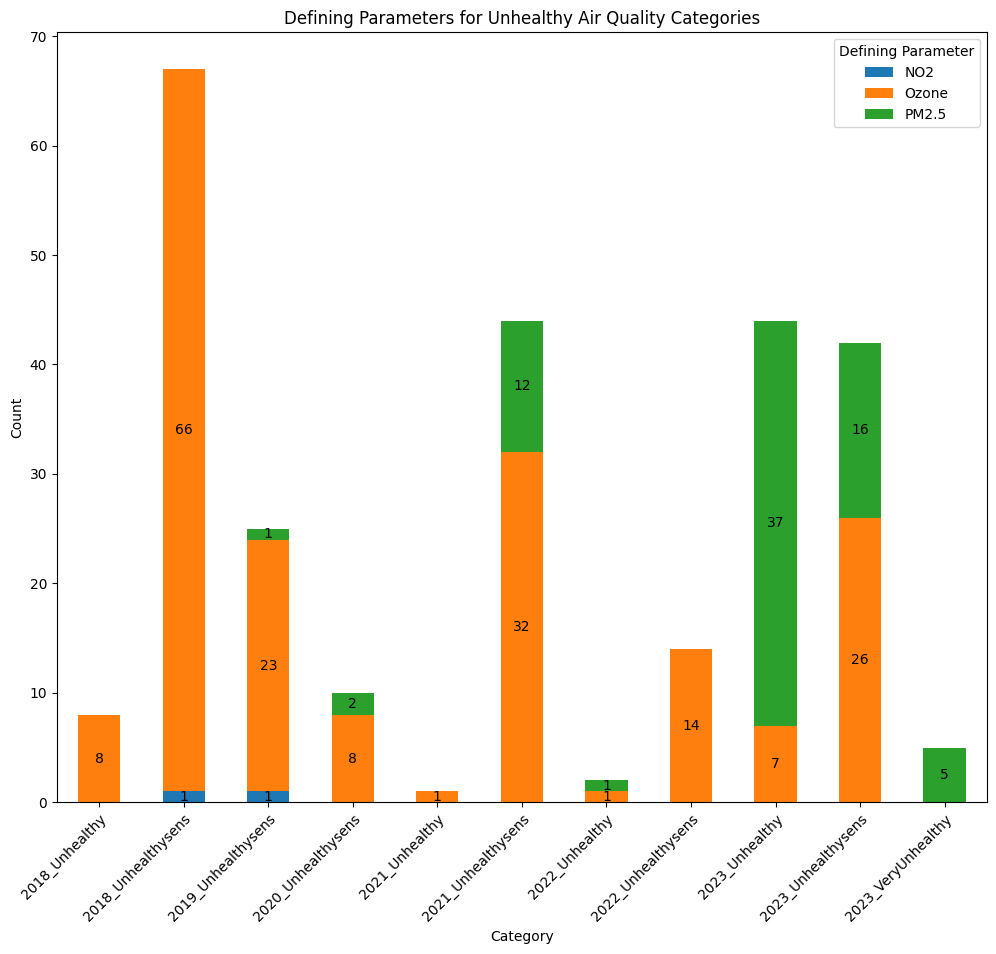

In [32]:
# Create a stacked bar chart
ax = merged_categories_df.T.plot(kind='bar', stacked=True, figsize=(12, 10))

# Add value labels on top of each section of the bars for values greater than zero
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f"{h:.0f}" if h > 0 else "" for h in container.datavalues])  # Place the label in the center of each section

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Defining Parameters for Unhealthy Air Quality Categories')
plt.legend(title='Defining Parameter')
plt.xticks(rotation=45, ha='right', wrap=True)

# Save and show the plot
plt.savefig("defining_parameters_by_years.png")
plt.show()

In [33]:
# Pull in NJ factories csv
nj_factories=pd.read_csv("Resources/nj_factories.csv")
nj_factories.head()

Reporting Year                              FACILITY NAME  GHGRP ID  \
0            2022        ANHEUSER-BUSCH, INC. NEWARK BREWERY   1003525   
1            2022                   ATLANTIC COUNTY LANDFILL   1001858   
2            2022              Ardagh Glass Inc. (Bridgeton)   1002504   
3            2022                   BRISTOL MYERS SQUIBB INC   1006828   
4            2022  BURLINGTON CNTY RESOURCE RECOVERY COMPLEX   1006969   

      REPORTED ADDRESS   LATITUDE  LONGITUDE            CITY NAME  \
0   200 US HIGHWAY ONE  40.691600 -74.191600               NEWARK   
1    6700 Delilah Road  39.416530 -74.540360  EGG HARBOR TOWNSHIP   
2       443 S EAST AVE  39.409000 -75.219580            BRIDGETON   
3     ONE SQUIBB DRIVE  40.474920 -74.445110      NORTH BRUNSWICK   
4  21939 COLUMBUS ROAD  40.082778 -74.713889             COLUMBUS   

         COUNTY NAME STATE  ZIP CODE  \
0       ESSEX COUNTY    NJ      7114   
1    ATLANTIC COUNTY    NJ      8234   
2  CUMBERLAND COUNTY    NJ      8302   
3   MIDDLESEX COUNTY    NJ      8902   
4  BURLINGTON COUNTY    NJ      8022   

                             PARENT COMPANIES  \
0               ANHEUSER-BUSCH COS LLC (100%)   
1  ATLANTIC COUNTY UTILITIES AUTHORITY (100%)   
2                     ARDAGH GLASS INC (100%)   
3              BRISTOL-MYERS SQUIBB CO (100%)   
4         BURLINGTON COUNTY NEW JERSEY (100%)   

   GHG QUANTITY (METRIC TONS CO2e) SUBPARTS  
0                            23836        C  
1                            44220     C,HH  
2                            54017      C,N  
3                            54360        C  
4                            46766     C,HH

In [34]:
factory_counties=nj_factories.groupby('COUNTY NAME')
ghg_values = nj_factories.groupby('COUNTY NAME')['GHG QUANTITY (METRIC TONS CO2e)'].sum()
county_names = ghg_values.index

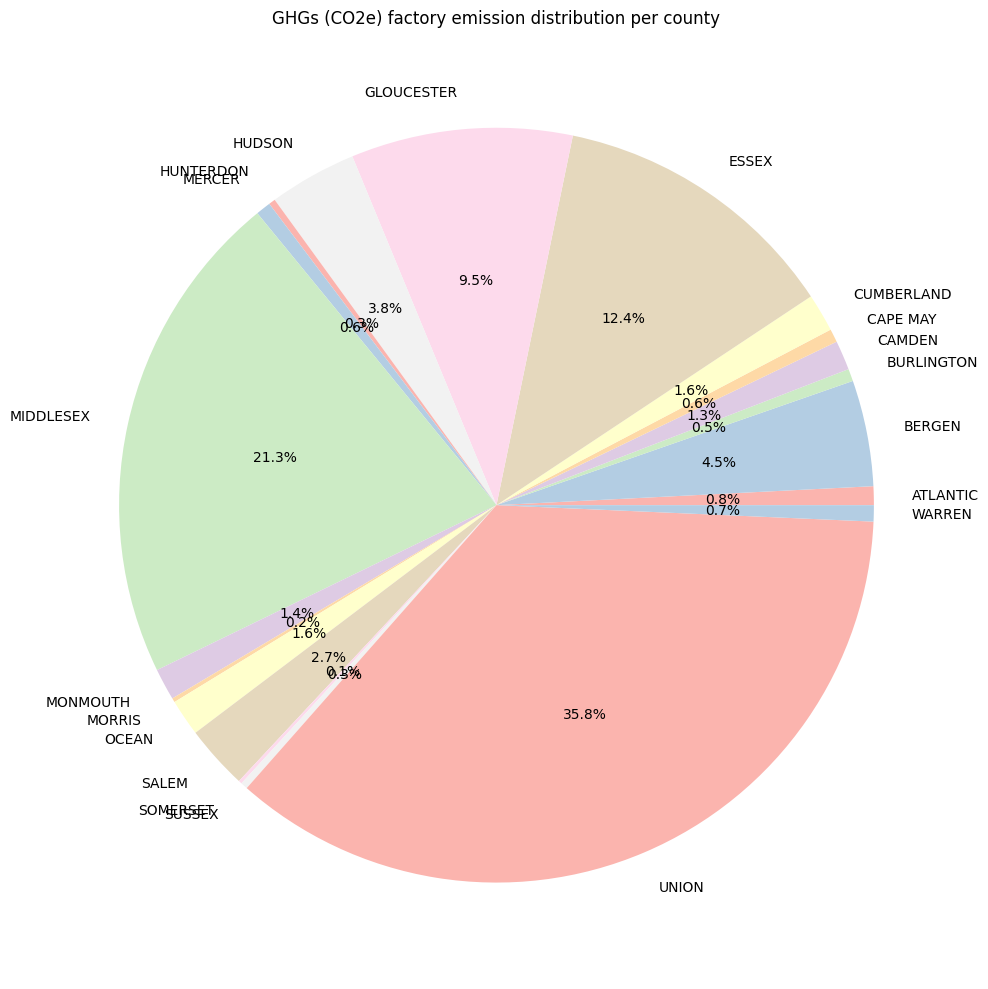

In [35]:
import re

# Normalize the county names by removing specific words like "COUNTY"
nj_factories['COUNTY NAME'] = nj_factories['COUNTY NAME'].str.replace(r'\bCOUNTY\b', '', regex=True)
nj_factories['COUNTY NAME'] = nj_factories['COUNTY NAME'].str.strip().str.upper()

# Sum the GHG quantities per county after grouping by the normalized county names
ghg_values = nj_factories.groupby('COUNTY NAME')['GHG QUANTITY (METRIC TONS CO2e)'].sum()

# Extract the county names from the DataFrame
county_names = ghg_values.index

ghg_percentages = ghg_values / ghg_values.sum() * 100


fig, ax = plt.subplots(figsize=(10, 10))
colors = plt.cm.Pastel1.colors 

wedges, texts, autotexts = ax.pie(ghg_percentages, labels=county_names, autopct='%1.1f%%', colors=colors)


ax.axis('equal')


ax.set_title("GHGs (CO2e) factory emission distribution per county")


plt.tight_layout()

In [36]:
top_counties = ghg_percentages.sort_values(ascending=False)
top_3_counties = top_counties.head(3)
print(top_3_counties)

COUNTY NAME
UNION        35.816049
MIDDLESEX    21.272108
ESSEX        12.426980
Name: GHG QUANTITY (METRIC TONS CO2e), dtype: float64


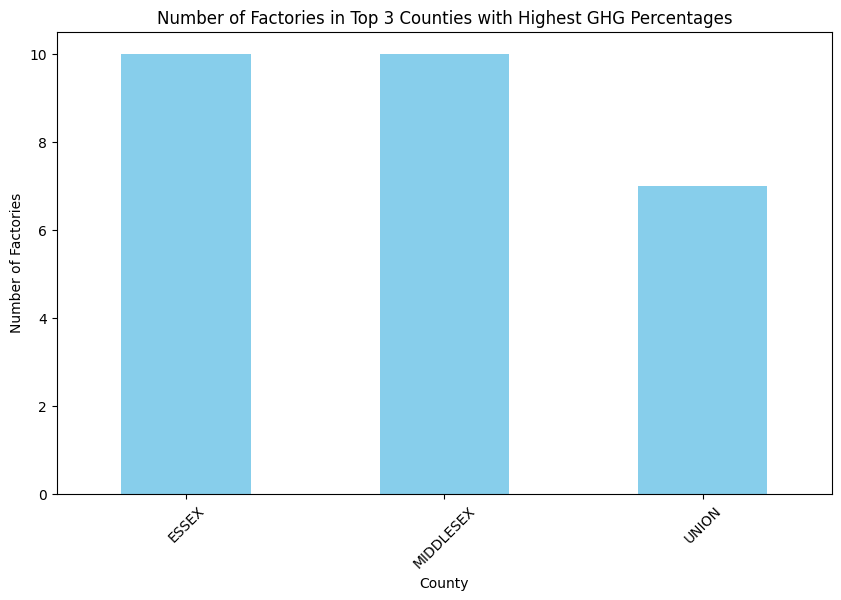

In [37]:
top_3_counties = top_counties.head(3).index  # Get the names of the top 3 counties
factories_top_3 = nj_factories[nj_factories['COUNTY NAME'].isin(top_3_counties)]

# Count the number of factories in each of the top 3 counties
factory_counts = factories_top_3['COUNTY NAME'].value_counts()

# Create a bar graph to visualize the factory counts for each county
plt.figure(figsize=(10, 6))
factory_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Factories in Top 3 Counties with Highest GHG Percentages')
plt.xlabel('County')
plt.ylabel('Number of Factories')
plt.xticks(rotation=45)
plt.show()

In [38]:
GHG_data=pd.read_csv("Resources/GHG_Emissions.csv")
GHG_data.head()
#NAICS North American Industry Classification System

2017 NAICS Code                  2017 NAICS Title       GHG  \
0           111110                   Soybean Farming  All GHGs   
1           111120  Oilseed (except Soybean) Farming  All GHGs   
2           111130          Dry Pea and Bean Farming  All GHGs   
3           111140                     Wheat Farming  All GHGs   
4           111150                      Corn Farming  All GHGs   

                                Unit  \
0  kg CO2e/2021 USD, purchaser price   
1  kg CO2e/2021 USD, purchaser price   
2  kg CO2e/2021 USD, purchaser price   
3  kg CO2e/2021 USD, purchaser price   
4  kg CO2e/2021 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          1.223   
1                                          1.223   
2                                          2.874   
3                                          2.874   
4                                          2.874   

   Margins of Supply Chain Emission Factors  \
0                                     0.103   
1                                     0.103   
2                                     0.134   
3                                     0.134   
4                                     0.134   

   Supply Chain Emission Factors with Margins Reference USEEIO Code  
0                                       1.326                1111A0  
1                                       1.326                1111A0  
2                                       3.007                1111B0  
3                                       3.007                1111B0  
4                                       3.007                1111B0

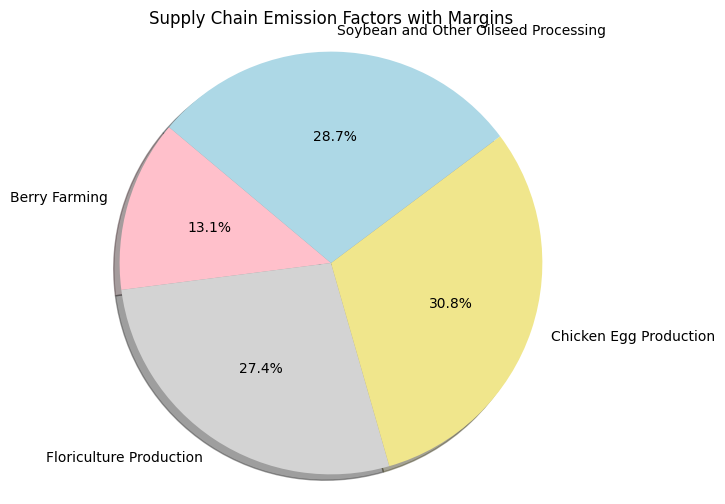

In [39]:
# Filter the DataFrame based on the values in the '2017 NAICS Title' column
NJ_columns_df = GHG_data[GHG_data['2017 NAICS Title'].isin(['Floriculture Production', 'Chicken Egg Production', 'Berry (except Strawberry) Farming', 'Soybean and Other Oilseed Processing'])]
naics_titles = ['Berry Farming', 'Floriculture Production', 'Chicken Egg Production', 'Soybean and Other Oilseed Processing']
supply_chain_factors = [0.5, 1.043, 1.171, 1.090]

plt.figure(figsize=(6, 6))
colors=["pink","lightgrey","khaki","lightblue"]
plt.pie(supply_chain_factors, labels=naics_titles, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.axis('equal')
plt.title('Supply Chain Emission Factors with Margins')
plt.show()

In [40]:
import requests
from config import api_key
from pprint import pprint

In [41]:
# Set the API base URL
city_name = 'New Brunswick'
# Build partial query URL
query_url = f"http://api.waqi.info/feed/{city_name}/?token={api_key}"
response = requests.get(query_url)
data= response.json()
pprint(data)

{'data': {'aqi': 18,
          'attributions': [{'logo': 'US-NJDEC.png',
                            'name': 'NJDEP/DAQ - New Jersey Department of '
                                    'Environmental Protection - Division of '
                                    'Air Quality',
                            'url': 'http://www.nj.gov/dep/daq/'},
                           {'name': 'Air Now - US EPA',
                            'url': 'http://www.airnow.gov/'},
                           {'name': 'World Air Quality Index Project',
                            'url': 'https://waqi.info/'}],
          'city': {'geo': [40.46218, -74.42944],
                   'location': '',
                   'name': 'Rutgers University, NewJersey, USA',
                   'url': 'https://aqicn.org/city/usa/newjersey/rutgers-university'},
          'debug': {'sync': '2024-08-14T11:23:59+09:00'},
          'dominentpol': 'pm25',
          'forecast': {'daily': {'o3': [{'avg': 12,
                              

In [42]:
# Initialize lists to store data
aqi_values = []
latitudes = []
longitudes = []

cities = ['New York','Los Angeles','Chicago','Houston','Phoenix','Philadelphia','San Antonio','San Diego','Dallas','Jacksonville','Austin','Seattle','Saint Paul',
         'Bakersfield','Visalia','Hanford','San Jose','San Francisco','Long Beach','Grants Pass','Fairbanks','Mesa','Chico','Sacramento','Roseville','Cincinnati','Wilmington',
          'Indianapolis','Pittsburgh','New Castle','Weirton', 'Bend','Salt lake City','Hilo','Anchorage','Peoria','Tucson','Augusta','New Brunswick','Portland','Richmond','Atlanta','Charlotte','Seattle','Tampa','San Antonio','Miami','Boston',
         'Colorado Springs','New Orleans','Denver','Nashville']

# Loop through the list of cities and perform a request for data on each
for city_name in cities:
    url = f"http://api.waqi.info/feed/{city_name}/?token={api_key}"
    response = requests.get(url)
    json_data = response.json()
    aqi_values.append(json_data['data']['aqi'])
    latitudes.append(json_data['data']['city']['geo'][0])
    longitudes.append(json_data['data']['city']['geo'][1])

print(f"The AQI information is: {aqi_values}")
print(f"The latitude information is: {latitudes}")
print(f"The longitude information is: {longitudes}")

The AQI information is: [28, 60, 39, 17, 32, 33, 19, 44, 42, 37, 50, 21, 38, 38, 30, 54, 46, 18, 56, 5, 23, 34, 42, 30, 51, 37, 36, 34, 28, 50, 30, 61, 37, 5, 5, 34, 34, 46, 18, 33, 28, 52, 45, 21, 14, 19, 38, 81, 21, 69, 18, 33]
The latitude information is: [40.7127837, 34.06653, 41.9136, 29.686389, 33.403055555556, 39.934635, 29.4072945, 32.7101770008584, 32.8200608, 30.356388888889, 30.3544356, 47.597222, 44.9594, 35.35662, 36.33252, 36.31572, 37.34849, 37.76595, 33.7924, 42.434149, 64.8458, 33.410277777778, 39.76168, 38.56844, 38.74643, 39.12886, 39.7394, 39.787933, 40.4045579, 40.9958, 40.366452, 44.063916, 40.733501, 19.71756222, 61.1744921, 33.569166666667, 32.251846, 33.433349, 40.46218, 45.496640911, 37.55652, 33.720192, 35.281791, 47.597222, 27.928333333333, 29.4072945, 25.794722222222, 42.3584308, 38.848014, 29.993278, 39.751184, 36.1767]
The longitude information is: [-74.0059413, -118.22676, -87.7239, -95.294722, -112.07527777778, -75.126126, -98.431251, -117.142665, -96.8

In [43]:
# create a DataFrame from cities, api, lat, and long
city_dict = {
    "city": cities,
    "AQI": aqi_values,
    "lat": latitudes,
    "lon": longitudes
}
city_data = pd.DataFrame(city_dict)
city_data.head()

city  AQI        lat         lon
0     New York   28  40.712784  -74.005941
1  Los Angeles   60  34.066530 -118.226760
2      Chicago   39  41.913600  -87.723900
3      Houston   17  29.686389  -95.294722
4      Phoenix   32  33.403056 -112.075278

In [44]:
# Dependencies and Setup
import hvplot.pandas
# Import API key
from config import geoapify_key
import holoviews as hv

In [45]:
%%capture --no-display
coordinates = {
    "Lat": (city_data["lat"]),
    "Lng": (city_data["lon"]),
    "City": (city_data["city"]),
    "AQI": (city_data["AQI"])
}

coordinates_df = pd.DataFrame(coordinates)

# Configure the map plot_4
aqi_map = coordinates_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "AQI",
    frame_width = 700,
    frame_height = 500,
    color = "City"
)
   

# Display the map plot
aqi_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,AQI)